# Dimensionality Reduction, Feature Extraction, and Feature Transformation
Transforming data using unsupervised learning can have many motivations. The most common motivations are visualization, compressing the data, and finding a representation that is more informative for further processing.
One of the simplest and most widely used algorithms for all of these is principal component analysis (PCA). We’ll also look at independent component analysis (ICA).

## Principal Component Analysis (PCA)
Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data. PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance.

### Advantages of PCA
* Principal components are ordered by importance
    * Makes the task of dimensionality reduction and feature extraction easy - just retain the first n components
* Relatively fast compared to other methods like ICA
* Enables visualization of the most important parts of higher dimenstional datasets
    
### Disadvantages of PCA
* Requires pre-processing of the data so that all features have zero mean and ideally unit variance
* The principal components are often not very easy to interpret
    * The principal components correspond to directions in the original data, so they are combinations of the original features. However, these combinations are usually very complex.
* Theory behind PCA makes various assumptions which may not always be true including:
    * Principal components are linear combinations of the original features
    * Both the data and the noise have distributions which are Gaussian in each dimension
    * Signal-to-noise-ratio (SNR) is relatively high
    * Principal components are all orthogonal to each other

### PCA in scikit-learn
In scikit-learn, [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is implemented as a transformer object that learns n components in its **fit** method, and can be used on new data to project it on these components.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following example illustrates the effect of PCA on a synthetic two-dimensional dataset:

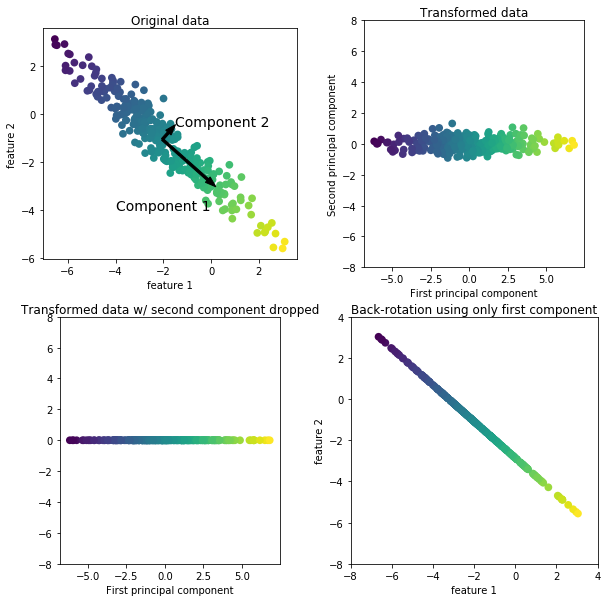

In [3]:
from sklearn.decomposition import PCA

def plot_pca_illustration():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA()
    pca.fit(X_blob)
    X_pca = pca.transform(X_blob)

    S = X_pca.std(axis=0)

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()

    axes[0].set_title("Original data")
    axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[0].set_xlabel("feature 1")
    axes[0].set_ylabel("feature 2")
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                  S[1] * pca.components_[1, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].text(-1.5, -.5, "Component 2", size=14)
    axes[0].text(-4, -4, "Component 1", size=14)
    axes[0].set_aspect('equal')

    axes[1].set_title("Transformed data")
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[1].set_xlabel("First principal component")
    axes[1].set_ylabel("Second principal component")
    axes[1].set_aspect('equal')
    axes[1].set_ylim(-8, 8)

    pca = PCA(n_components=1)
    pca.fit(X_blob)
    X_inverse = pca.inverse_transform(pca.transform(X_blob))

    axes[2].set_title("Transformed data w/ second component dropped")
    axes[2].scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[2].set_xlabel("First principal component")
    axes[2].set_aspect('equal')
    axes[2].set_ylim(-8, 8)

    axes[3].set_title("Back-rotation using only first component")
    axes[3].scatter(X_inverse[:, 0], X_inverse[:, 1], c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[3].set_xlabel("feature 1")
    axes[3].set_ylabel("feature 2")
    axes[3].set_aspect('equal')
    axes[3].set_xlim(-8, 4)
    axes[3].set_ylim(-8, 4)

plot_pca_illustration()

The first plot (top left) shows the original data points, colored to distinguish among them. The algorithm proceeds by first finding the direction of maximum variance, labeled “Component 1.” This is the direction (or vector) in the data that contains most of the information, or in other words, the direction along which the features are most correlated with each other. Then, the algorithm finds the direction that contains the most information while being orthogonal (at a right angle) to the first direction. In two dimensions, there is only one possible orientation that is at a right angle, but in higher-dimensional spaces there would be (infinitely) many orthogonal directions. Although the two components are drawn as arrows, it doesn’t really matter where the head and the tail are; we could have drawn the first component from the center up to the top left instead of down to the bottom right. The directions found using this process are called *principal components*, as they are the main directions of variance in the data. In general, there are as many principal components as original features.

The second plot (top right) shows the same data, but now rotated so that the first principal component aligns with the x-axis and the second principal component aligns with the y-axis. Before the rotation, the mean was subtracted from the data, so that the transformed data is centered around zero. In the rotated representation found by PCA, the two axes are uncorrelated, meaning that the correlation matrix of the data in this representation is zero except for the diagonal.

We can use PCA for dimensionality reduction by retaining only some of the principal components. In this example, we might keep only the first principal component, as shown in the third panel above (bottom left). This reduces the data from a two-dimensional dataset to a one-dimensional dataset. Note, however, that instead of keeping only one of the original features, we found the most interesting direction (top left to bottom right in the first panel) and kept this direction, the first principal component.

Finally, we can undo the rotation and add the mean back to the data. This will result in the data shown in the last panel above. These points are in the original feature space, but we kept only the information contained in the first principal component. This transformation is sometimes used to remove noise effects from the data or visualize what part of the information is retained using the principal components.

### Applying PCA to the cancer dataset for visualization
One of the most common applications of PCA is visualizing high-dimensional datasets. It is hard to create scatter plots of data that has more than two features. For the Iris dataset, we were able to create a pair plot that gave us a partial picture of the data by showing us all the possible combinations of two features. But if we want to look at the Breast Cancer dataset, even using a pair plot is tricky. This dataset has 30 features, which would result in 30 * 14 = 420 scatter plots! We’d never be able to look at all these plots in detail, let alone try to understand them.

There is an even simpler visualization we can use, though—computing histograms of each of the features for the two classes, benign and malignant cancer:

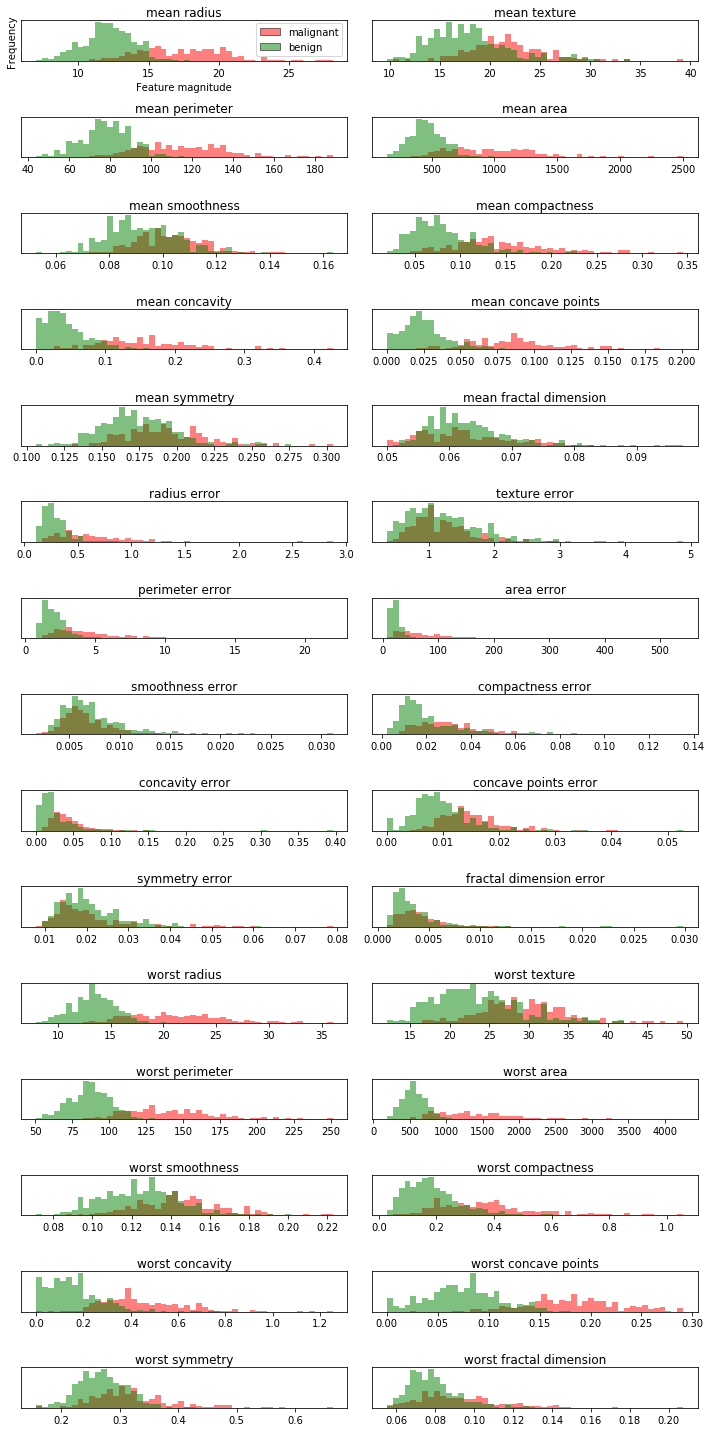

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='r', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='g', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Here we create a histogram for each of the features, counting how often a data point appears with a feature in a certain range (called a *bin*). Each plot overlays two histograms, one for all of the points in the benign class (green) and one for all the points in the malignant class (red). This gives us some idea of how each feature is distributed across the two classes, and allows us to venture a guess as to which features are better at distinguishing malignant and benign samples. For example, the feature “smoothness error” seems quite uninformative, because the two histograms mostly overlap, while the feature “worst concave points” seems quite informative, because the histograms are quite disjoint.

However, this plot doesn’t show us anything about the interactions between variables and how these relate to the classes. Using PCA, we can capture the main interactions and get a slightly more complete picture. We can find the first two principal components, and visualize the data in this new two-dimensional space with a single scatter plot.

Before we apply PCA, we scale our data so that each feature has zero mean and unit variance using StandardScaler:

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation. We instantiate the **PCA** object, find the principal components by calling the **fit** method, and then apply the rotation and dimensionality reduction by calling **transform**. By default, **PCA** only rotates (and shifts) the data, but keeps all principal components. To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating the **PCA** object:

In [15]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


We can now plot the first two principal components:

In [17]:
import matplotlib as mpl
from matplotlib.colors import colorConverter

def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.

    Parameters
    ----------

    x1 : nd-array
        input data, first axis

    x2 : nd-array
        input data, second axis

    y : nd-array
        input data, discrete labels

    cmap : colormap
        Colormap to use.

    markers : list of string
        List of markers to use, or None (which defaults to 'o').

    s : int or float
        Size of the marker

    padding : float
        Fraction of the dataset range to use for padding the axes.

    alpha : float
        Alpha value for all points.
    """
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines

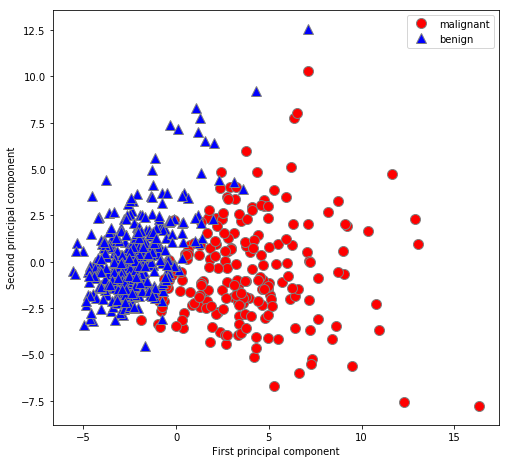

In [21]:
# plot first vs. second principal component, colored by class
c = ['r', 'b']
plt.figure(figsize=(8, 8))
discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target, c=c)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

It is important to note that PCA is an unsupervised method, and does not use any class information when finding the rotation. It simply looks at the correlations in the data. For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points. You can see that the two classes separate quite well in this two-dimensional space. This leads us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes. We can also see that the malignant (red) points are more spread out than the benign (blue) points—something that we could already see a bit from the histograms above.

A downside of PCA is that the two axes in the plot are often not very easy to interpret. The principal components correspond to directions in the original data, so they are combinations of the original features. However, these combinations are usually very complex, as we’ll see shortly. The principal components themselves are stored in the `components_` attribute of the PCA object during fitting:

In [22]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Each row in `components_` corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, etc.). The columns correspond to the original features attribute of the PCA in this example, “mean radius,” “mean texture,” and so on. Let’s have a look at the content of `components_`:

In [23]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


We can also visualize the coefficients using a heat map, which might be easier to understand:

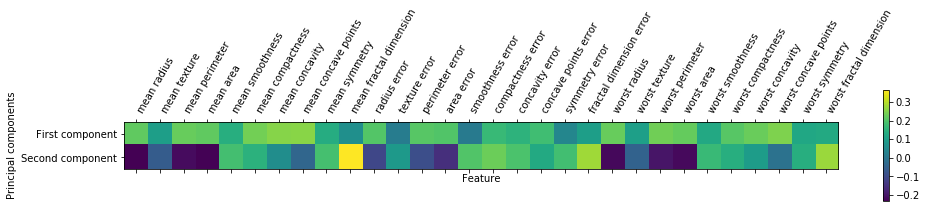

In [24]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

You can see that in the first component, all features have the same sign. That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well. The second component has mixed signs, and both of the components involve all of the 30 features. This mixing of all features is what makes explaining what the principal components represent so tricky.

Prevoiusly, using Random Forests we were able to get an accuracy of 0.972 on the complete cancer dataset:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


What if we just use the these first two principal components?

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.944


Wow.  94% accuracy for using just the first two principal components versus 97% accuracy for all 30 features!  That's pretty amazing.

## Independent Component Analysis (ICA)
Independent component analysis separates a multivariate signal into additive subcomponents that are maximally independent.  Typically, ICA is not used for reducing dimensionality but for separating superimposed signals. Since the ICA model does not include a noise term, for the model to be correct, whitening must be applied. This can be done internally using the whiten argument or manually using one of the PCA variants.



### Advantages of ICA
* Good for separating superimposed signals
* Theory behind it makes fewer and different assumptions than PCA, so it can work in cases where PCA won't
    * Critically it does not assume that the signals reflect Gaussian processes
    
### Disadvantages of ICA
* Slow
* No ordering of the independent components
    * So not a good algorithm for dimensionality reduction

### ICA in scikit-learn
ICA is implemented in *scikit-learn* using the [FastICA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html) algorithm. 

### Blind source separation using ICA
ICA is classically used to separate mixed signals (a problem known as blind source separation), as in the example below.  This is an example of estimating sources from noisy data.

Independent component analysis (ICA) is used to estimate sources given noisy measurements. Imagine 3 instruments playing simultaneously and 3 microphones recording the mixed signals. ICA is used to recover the sources ie. what is played by each instrument. Importantly, PCA fails at recovering our instruments since the related signals reflect non-Gaussian processes.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

Generate sample data:

In [36]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

Plot results

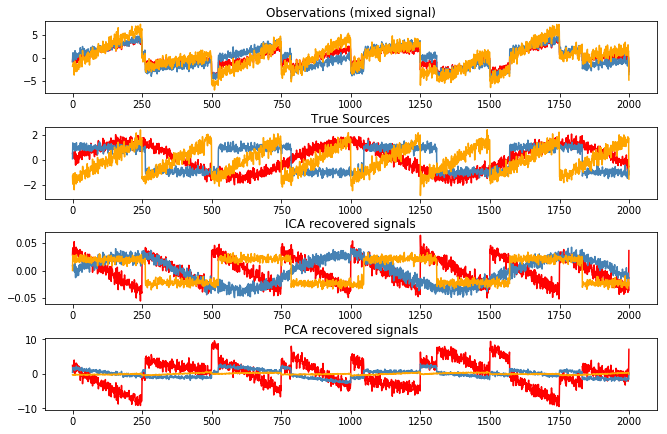

In [37]:
plt.figure(figsize=(10,6))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()